#
#           Data Analysis on Netflix Data

In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("netflix_data.csv", encoding="utf-8")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"""Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,"""December 23, 2016""",2016,93,"""After a devastating earthquake hits Mexico Ci...",Dramas
1,s3,Movie,23:59,Gilbert Chan,"""Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,"""December 20, 2018""",2011,78,"""When an army recruit is found dead, his fello...",Horror Movies
2,s4,Movie,9,Shane Acker,"""Elijah Wood, John C. Reilly, Jennifer Connell...",United States,"""November 16, 2017""",2009,80,"""In a postapocalyptic world, rag-doll robots h...",Action
3,s5,Movie,21,Robert Luketic,"""Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,"""January 1, 2020""",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"""Erdal Beşikçioğlu, Yasemin Allen, Melis Birka...",Turkey,"""July 1, 2017""",2016,1,"""A genetics professor experiments with a treat...",International TV


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [4]:
data.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


In [5]:
# Convert `release_year` to a proper year format and handle missing values
data['release_year'] = pd.to_datetime(data['release_year'], errors='coerce').dt.year

In [6]:
# Drop rows with missing values in critical columns
data = data.dropna(subset=['duration', 'release_year', 'genre', 'country'])

# Bar Plot: Number of Shows by Country

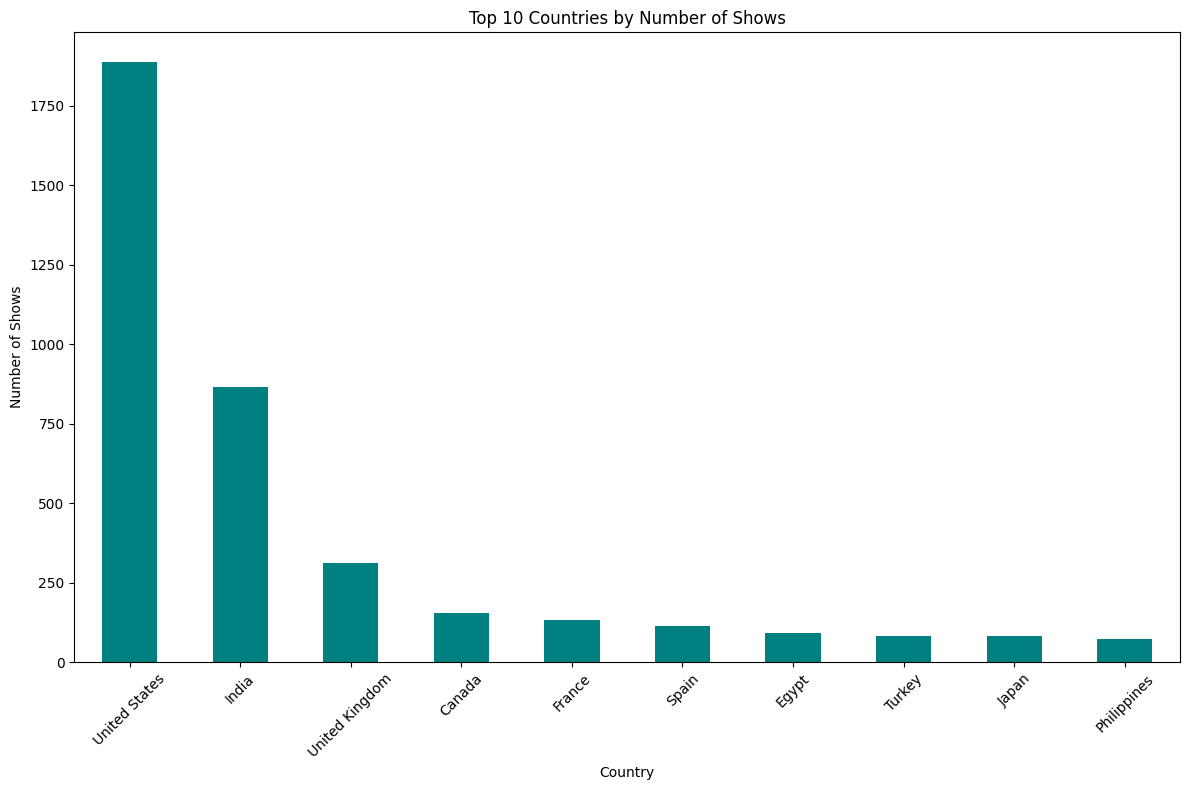

In [7]:

shows_by_country = data['country'].value_counts().head(10)  # Top 10 countries
# Convert `release_year` to a proper year format and handle missing values
data['release_year'] = pd.to_datetime(data['release_year'], errors='coerce').dt.year

# Drop rows with missing values in critical columns
data = data.dropna(subset=['duration', 'release_year', 'genre', 'country'])

plt.figure(figsize=(12, 8))
shows_by_country.plot(kind='bar', color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Box Plot: Duration by Genre

<Figure size 1400x800 with 0 Axes>

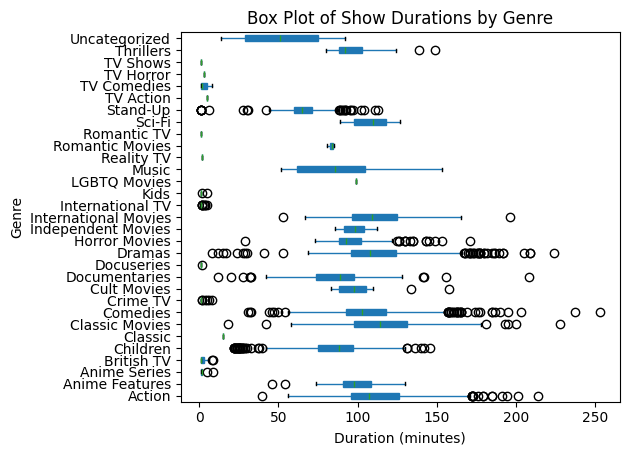

In [8]:

plt.figure(figsize=(14, 8))
data.boxplot(column='duration', by='genre', grid=False, patch_artist=True, vert=False)
plt.title('Box Plot of Show Durations by Genre')
plt.xlabel('Duration (minutes)')
plt.ylabel('Genre')
plt.suptitle('')  # Suppress the automatic title to keep it clean
plt.tight_layout()
plt.show()



# Bar Plot: Average Duration of Movies by Director

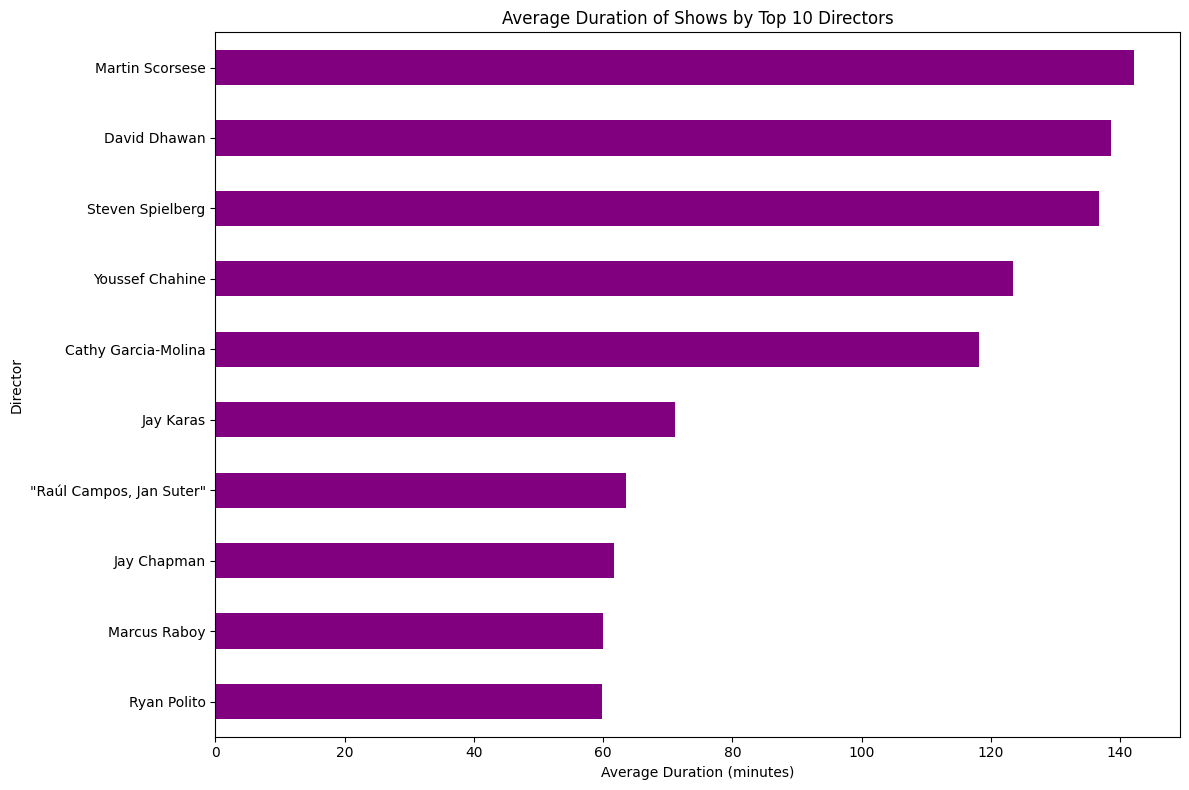

In [9]:

top_directors = data['director'].value_counts().head(10).index
avg_duration_by_director = data[data['director'].isin(top_directors)].groupby('director')['duration'].mean().sort_values()

plt.figure(figsize=(12, 8))
avg_duration_by_director.plot(kind='barh', color='purple')
plt.title('Average Duration of Shows by Top 10 Directors')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

# Histogram: Distribution of Show Durations by Type (Movies vs. TV Shows)

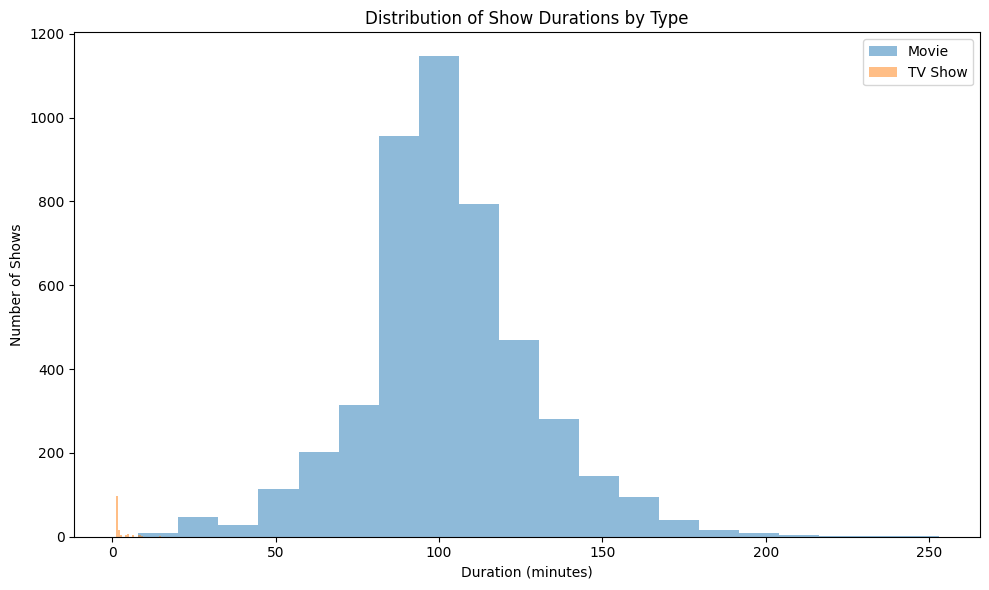

In [10]:

plt.figure(figsize=(10, 6))
for show_type in data['type'].unique():
    type_data = data[data['type'] == show_type]
    plt.hist(type_data['duration'], bins=20, alpha=0.5, label=show_type)

plt.title('Distribution of Show Durations by Type')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Shows')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# Calculate the average duration per year

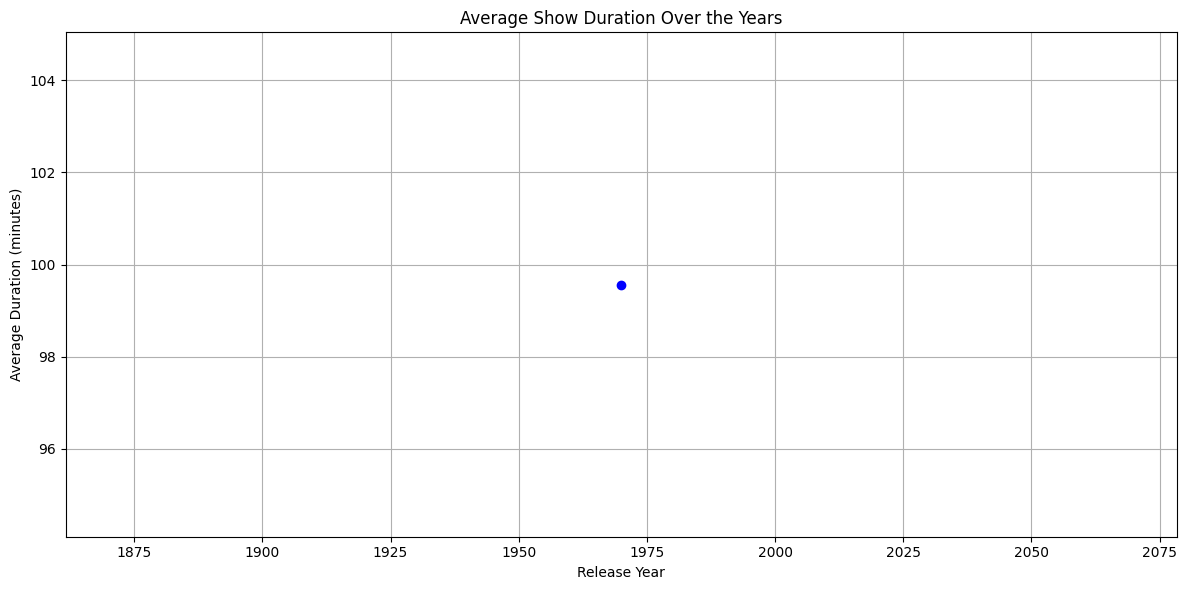

In [11]:

avg_duration_per_year = data.groupby('release_year')['duration'].mean()

# Generate the line plot
plt.figure(figsize=(12, 6))
plt.plot(avg_duration_per_year.index, avg_duration_per_year.values, marker='o', linestyle='-', color='blue')
plt.title('Average Show Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()